
#  <font color="darkred"> &#10070; Recherche dans une liste </font>

On souhaite écrire une fonction `indice(elt,liste)`qui renvoie :
* l'indice de la première occurence de `elt` s'il apparait dans `liste`
* `False` sinon  

Par exemples : 
* indice(3,[1,5,3,2]) doit renvoyer 2 (élément présent en 3e position)
* indice(3,[1,5,2]) doit renvoyer False (élément absent)
* indice(3,[1,3,5,3,2,3]) doit renvoyer 1 (élément présent en plusieurs positions, on retourne la première position)

On testera deux algorithmes :
* Une recherche par parcours simple de la liste 
* Une recherche par dichotomie


## <font color="darkblue"> &diams; Recherche par parcours simple de la liste</font>


<font color="green"><b>a.</b> Ecrire la fonction <code>indice(elt, liste)</code>en écrivant un *parcours par indice* de la liste passée en paramètre, c'est à dire avec une boucle de la forme <code> for indice in range(0,len(liste))</code>

In [1]:
# Taper votre fonction ici
def indice(elt,liste):
    for indice in range(0,len(liste)):
        if elt==liste[indice]:
            return indice
    return False

<font color="green"><b>b.</b> A l'aide d'instructions <code>assert</code>, tester le comportement de votre fonction sur les trois exemples donnés dans l'introduction ci-dessus </font>

In [2]:
# Vos tests ici
assert indice(3,[1,5,3,2])==2
assert indice(3,[1,5,2])==False
assert indice(3,[1,3,5,3,2,3])==1

<font color="green"><b>c.</b> Dans le pire des cas, pour une liste de longueur $n$, combien de comparaisons seront effectuées par votre fonction avant de renvoyer le résultat ? Que peut-on en déduire ?</font>

On effectue un maximum de $n$ comparaisons, par conséquent on peut dire que cette algorithme a une complexité en $O(n)$

<font color="green"><b>d.</b> On souhaite tracer l'évolution du temps d'exécution lorsque la taille de la liste augmente. Quel devrait être l'allure du graphe obtenu ? Justifier</font>

 Le graphe obtenu doit être une droite car la complexité est linéaire.

<font color="green"><b>e.</b> Le module <code>timeit</code> de Python permet de mesurer le temps d'exécution d'une fonction. Consulter la <a href="https://docs.python.org/3/library/timeit.html">documentation de ce module</a> pour en voir des exemples d'utilisation.</font>

In [10]:
# Vous pouvez utiliser cette cellule pour importer le module timeit 
# Et faire quelques tests pour comprendre son fonctionnement
import timeit
N = 10000
L = [i for i in range(0,N)]
timeit.timeit('indice(N,L)',number=1000,globals=globals())

0.40411260800101445

<font color="green"><b>f.</b> Mesurer le temps d'exécution de votre fonction <code>indice</code> pour une liste de taille 10000, 20000, 40000, 60000, 80000 et 100000 éléments (générér aléatoirement votre liste ou prendre la liste des premiers entiers). Tracer le graphe à l'aide d'un tableur </font>


Noter ici les temps d'exécution obtenus :
*  10 000 éléments : 0.404
*  20 000 éléments : 0.802
*  40 000 éléments : 1.657
*  60 000 éléments : 2.478
*  80 000 éléments : 3.270
* 100 000 éléments : 4.111

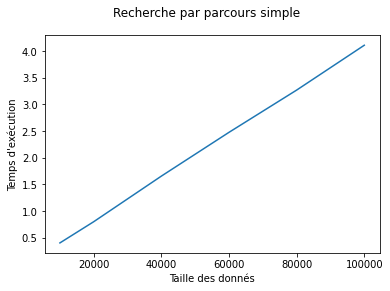

In [12]:
# On peut utiliser matplotlib pour avoir directement l'allure du graphique
%matplotlib inline
x = [10000,20000,40000,60000,80000,100000]
y = [0.404,0.802,1.657,2.478,3.270,4.111]
import matplotlib.pyplot as plt
plt.xlabel("Taille des donnés")
plt.ylabel("Temps d'exécution")
plt.suptitle("Recherche par parcours simple")
plt.plot(x, y)

## <font color="darkblue"> &diams; Recherche dichotomique dans un tableau trié</font>

On suppose maintenant que la liste est **triée**. L'algorithme de recherche s'appelle alors la <font color="red">dichotomie</font>. Il consiste à **réduire de moitié à chaque étape** la plage de recherche de l'élément. En effet :
1. On compare l'élément cherché avec celui situé au "milieu" de la liste
2. S'il est plus petit on recherche alors entre le debut et le milieu, sinon entre le milieu et la fin
3. On recommence l'étape 1 tant que la plage de recherche ne se limite pas à un élément

<font color="green"><b>a.</b> Ecrire la fonction <code>dichotomie(elt, liste)</code>

In [27]:
# Ecrire la fonction dichotomie ici
def dichotomie(elt,liste):
    debut = 0
    fin = len(liste)-1
    trouve = False
    while not trouve and fin-debut>1:
        milieu=(debut+fin)//2
        print(debut,fin,milieu)
        if liste[milieu]<elt:
            debut=milieu
        if liste[milieu]>elt:
            fin=milieu
        if liste[milieu]==elt:
            trouve=True
    if trouve:
        return milieu
    else:
        return False

<font color="green"><b>b.</b> A l'aide d'instructions <code>assert</code>, tester le comportement de votre fonction. Ne pas oublier que la liste doit être triée</font>

In [29]:
# Quelques tests pour la fonction dichotomie
dichotomie(28,[14, 15, 17, 22, 23, 27, 29, 34, 38])


0 8 4
4 8 6
4 6 5


False

In [17]:
(5+5)//2

5

<font color="green"><b>c.</b> De même que pour la recherche par parcours simple, mesurer le temps d'exécution de votre fonction <code>dichotomie</code> pour des tailles de listes variant entre 10000 et 100000 éléments (la liste devant être triée on pourra utiliser des listes successives d'entiers).</font>

In [23]:
N = 10000
L = [i for i in range(0,N)]
timeit.timeit('dichotomie(N,L)',number=1000000,globals=globals())

2.438352578999911

Noter ici les temps d'exécution obtenus :
*  10 000 éléments : 2.438
*  20 000 éléments : 2.574
*  40 000 éléments : 2.782
*  60 000 éléments : 2.802
*  80 000 éléments : 2.950
* 100 000 éléments : 2.951

<font color="green"><b>d.</b> Tracer le graphe du temps d'exécution en fonction de la taille de la liste. Commenter en comparant avec le graphe obtenu pour la recherche par parcours simple </font>

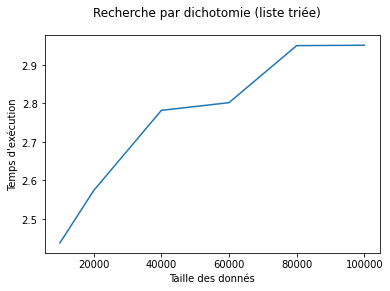

In [24]:
x = [10000,20000,40000,60000,80000,100000]
y = [2.438,2.574,2.782,2.802,2.950,2.951]
import matplotlib.pyplot as plt
plt.xlabel("Taille des donnés")
plt.ylabel("Temps d'exécution")
plt.suptitle("Recherche par dichotomie (liste triée)")
plt.plot(x, y)

## <font color="darkblue"> &diams; Version récursive</font>

Ecrire une version récursive de la fonction de recherche par dichotomie dans un tableau trié.

In [37]:
# Votre fonction de recherche par dichotomie version récursive
def dichotomie_recursive(elt,liste,debut,fin):
    if fin-debut==1:
        if liste[debut]==elt: 
            return debut
        else:
            return False
    milieu=(debut+fin)//2
    if elt==liste[milieu]:
        return milieu
    if elt<liste[milieu]:
        return dichotomie_recursive(elt,liste,0,milieu+1)
    if elt>liste[milieu]:
        return dichotomie_recursive(elt,liste,milieu,fin)

dichotomie_recursive(55,[i for i in range(100)],0,100)

55